#### Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Age','Fare','Survived'])

In [2]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### how select the arbitary variables.
1.It should be more frequently present.

<AxesSubplot:>

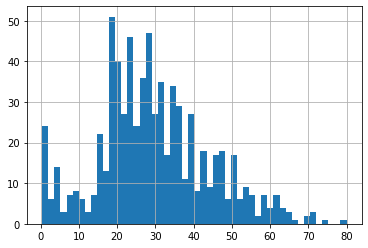

In [3]:
df['Age'].hist(bins=50)

In [4]:
def impute_nan(df,variable):
    df[variable+'_zeroes']=df[variable].fillna(0)
    df[variable+"_hundreds"]=df[variable].fillna(100)

In [5]:
impute_nan(df,'Age')

In [6]:
df.head()

,Survived,Age,Fare,Age_zeroes,Age_hundreds
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


### Advantages
1.Easy to implement

2.Captures the importance of missingess if there is one
### Disadvantages
1.Distorts the original distribution of the variable

2.If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

### How To Handle Categroical Missing Values

#### Frequent Category Imputation

In [7]:
import numpy as np
import pandas as pd


In [8]:
df=pd.read_csv('house.csv')

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df=pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [12]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [13]:
df.isnull().sum().sort_values()

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [14]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the frequency with every feature

In [15]:
df.groupby(['BsmtQual'])['BsmtQual'].count()


BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:>

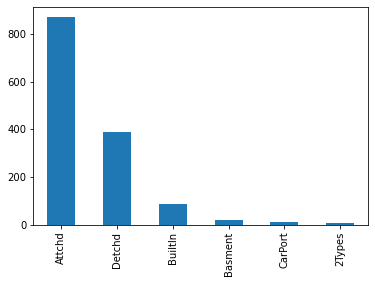

In [16]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

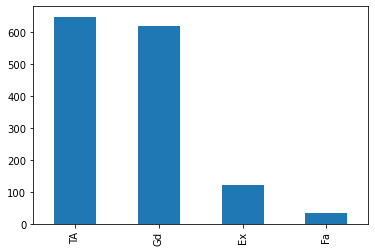

In [17]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

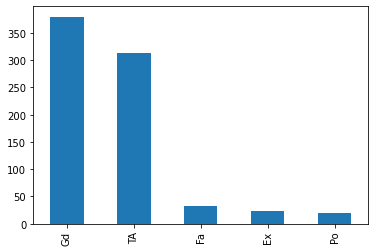

In [18]:
df['FireplaceQu'].value_counts().plot.bar()

In [19]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [20]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [21]:
for feature in ['GarageType','BsmtQual','FireplaceQu']:
    impute_nan(df,feature)
    

In [22]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Suppose if you have more frequent categories, we just replace NAN with a new category


In [24]:
df=pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [25]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [26]:
def impute_nan(df,variable):
    df[variable+'_new_var']=np.where(df[variable].isnull(),'missing',df[variable]) #here missing is my categoery.

In [27]:
for feature in ['GarageType','BsmtQual','FireplaceQu']:
    impute_nan(df,feature)

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_new_var,BsmtQual_new_var,FireplaceQu_new_var
0,Gd,NaN,Attchd,208500,Attchd,Gd,missing
1,Gd,TA,Attchd,181500,Attchd,Gd,TA
2,Gd,TA,Attchd,223500,Attchd,Gd,TA
3,TA,Gd,Detchd,140000,Detchd,TA,Gd
4,Gd,TA,Attchd,250000,Attchd,Gd,TA


In [29]:
#then we can drop the old features.
df.drop(['GarageType','BsmtQual','FireplaceQu'],axis=1,inplace=True)

In [31]:
df.sample(10)

,SalePrice,GarageType_new_var,BsmtQual_new_var,FireplaceQu_new_var
186,173000,Attchd,Gd,missing
382,213500,Attchd,Gd,missing
736,93500,Detchd,missing,missing
3,140000,Detchd,TA,Gd
560,121500,Detchd,Gd,Gd
1102,135000,Attchd,TA,missing
843,141000,missing,TA,missing
1037,287000,BuiltIn,Gd,TA
619,305000,Attchd,Gd,Gd
326,324000,Attchd,Gd,Gd
